In [2]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

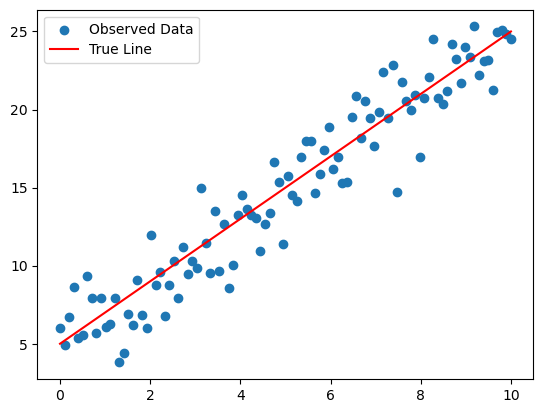

In [3]:
np.random.seed(42)

true_slope = 2
true_intercept = 5

x = np.linspace(0,10,100)
y_true = true_slope * x + true_intercept
y_observed = y_true + np.random.normal(scale=2, size=len(x))

plt.scatter(x,y_observed,label='Observed Data')
plt.plot(x,y_true,'r',label='True Line')
plt.legend()
plt.show
            

In [4]:
with pm.Model() as model:
    slope = pm.Normal('slope',mu=0,sd=10)
    intercept = pm.Normal('intercept',mu=0,sd=10)
    likelihood = pm.Normal('y',mu=slope*x + intercept, sd=2, observed=y_observed)
    

In [9]:
with model:
    trace = pm.sample(1000, tune=1000, cores=1)

pm.summary(trace).round(2)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,2.03,0.07,1.89,2.16,0.00,0.00,267.0,344.0,1.01
intercept,4.61,0.42,3.86,5.41,0.03,0.02,270.0,382.0,1.01


C:\Users\Talha\AppData\Local\Temp\ipykernel_10744\3359776160.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


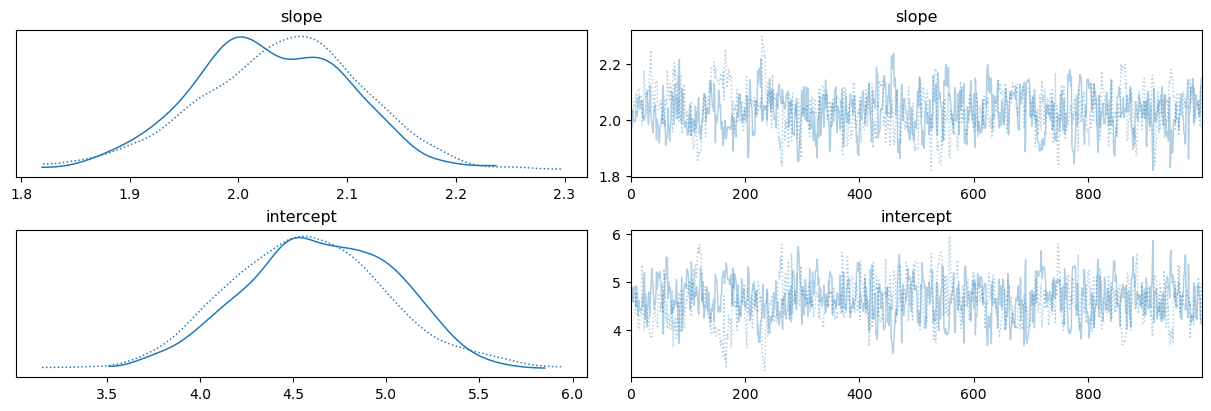

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


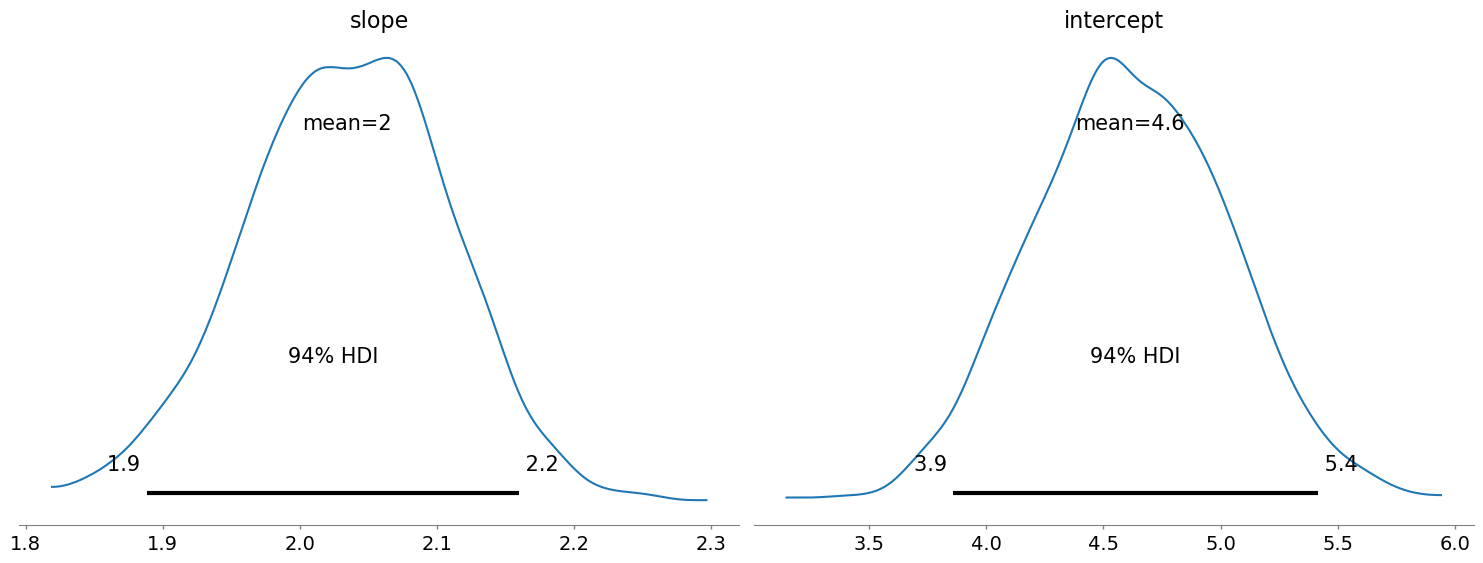

In [10]:
pm.traceplot(trace)
plt.show()
pm.summary(trace).round(2)
pm.plot_posterior(trace)
plt.show()